In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('./chipotle.csv')

In [3]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
num = 0
for i in df['item_price']:
    df['item_price'][num] = re.sub(pattern ='[$]', repl = "", string = i)
    #pattern ='[$]' : $기호를 찾을 정규식 패턴, []문자집합
    #repl = "" : 찾은 패턴을 빈 문자열 대체
    #string = i : item_price 열의 값
    
    num += 1
    
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5744\3630814059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_price'][num] = re.sub(pattern ='[$]', repl = "", string = i)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [ ]:
#lambda를 이용해 $제거
#df['item_price'] = df['item_price'].apply(lambda x : x.lstrip("$"))


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
df['item_price'] = df['item_price'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [8]:
df['item_price'].sum()

34500.16

In [9]:
df.isnull()
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [10]:
df['choice_description'] = df['choice_description'].fillna('default')
df.isnull().sum()
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,default,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,default,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [11]:
num = 0
for i in df['choice_description']:
    df['choice_description'][num] = re.sub(pattern = '[^a-zA-Z,]', repl = "", string = i)
    #알파벳과 쉼표를 제외한 모든 문자가 제거됨
    #^ 해당 문자 집합의 반대를 의미함
    num += 1
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5744\2234732418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['choice_description'][num] = re.sub(pattern = '[^a-zA-Z,]', repl = "", string = i)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,default,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,default,2.39
4,2,2,Chicken Bowl,"TomatilloRedChiliSalsaHot,BlackBeans,Rice,Chee...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"FreshTomatoSalsa,Rice,BlackBeans,SourCream,Che...",11.75
4618,1833,1,Steak Burrito,"FreshTomatoSalsa,Rice,SourCream,Cheese,Lettuce...",11.75
4619,1834,1,Chicken Salad Bowl,"FreshTomatoSalsa,FajitaVegetables,PintoBeans,G...",11.25
4620,1834,1,Chicken Salad Bowl,"FreshTomatoSalsa,FajitaVegetables,Lettuce",8.75


In [12]:
result = df.groupby(['item_name', 'choice_description']).value_counts()
# print(type(result))
tmp_index = result.index.tolist() #시리즈의 인덱스를 리스트로 변환해서 tmp_index에 저장
# tmp_index
tmp_values = result.values.tolist() #시리즈의 값들을 리스트로 변환해서 tmp_values에 저장
# tmp_values
result = result.to_frame() #to_frame()  : 시리즈를 데이터 프레임으로 변환할 때 사용
result #item_name, choice_descriptiohn 열의 값과 해당 그룹의 값의 개수가 열로 포함\

0
item_name         choice_description                                 order_id quantity item_price   
6 Pack Soft Drink Coke                                               154      1        6.49        1
                                                                     776      1        6.49        1
                                                                     1443     1        6.49        1
                                                                     1373     1        6.49        1
                                                                     1076     1        6.49        1
...                                                                                               ..
Veggie Soft Tacos FreshTomatoSalsaMild,BlackBeans,Rice,Cheese,Let... 1559     2        16.98       1
                  FreshTomatoSalsaMild,PintoBeans,Rice,Cheese,Sou... 567      1        8.49        1
                  RoastedChiliCornSalsa,FajitaVegetables,BlackBea... 948      1        8.75        1
                  RoastedChiliCornSalsaMedium,BlackBeans,FajitaVe... 1132     1        8.49        1
                  TomatilloRedChiliSalsa,FajitaVegetables,Rice,Bl... 304      1        11.25       1

[4563 rows x 1 columns]

In [13]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,default,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,default,2.39
4,2,2,Chicken Bowl,"TomatilloRedChiliSalsaHot,BlackBeans,Rice,Chee...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"FreshTomatoSalsa,Rice,BlackBeans,SourCream,Che...",11.75
4618,1833,1,Steak Burrito,"FreshTomatoSalsa,Rice,SourCream,Cheese,Lettuce...",11.75
4619,1834,1,Chicken Salad Bowl,"FreshTomatoSalsa,FajitaVegetables,PintoBeans,G...",11.25
4620,1834,1,Chicken Salad Bowl,"FreshTomatoSalsa,FajitaVegetables,Lettuce",8.75


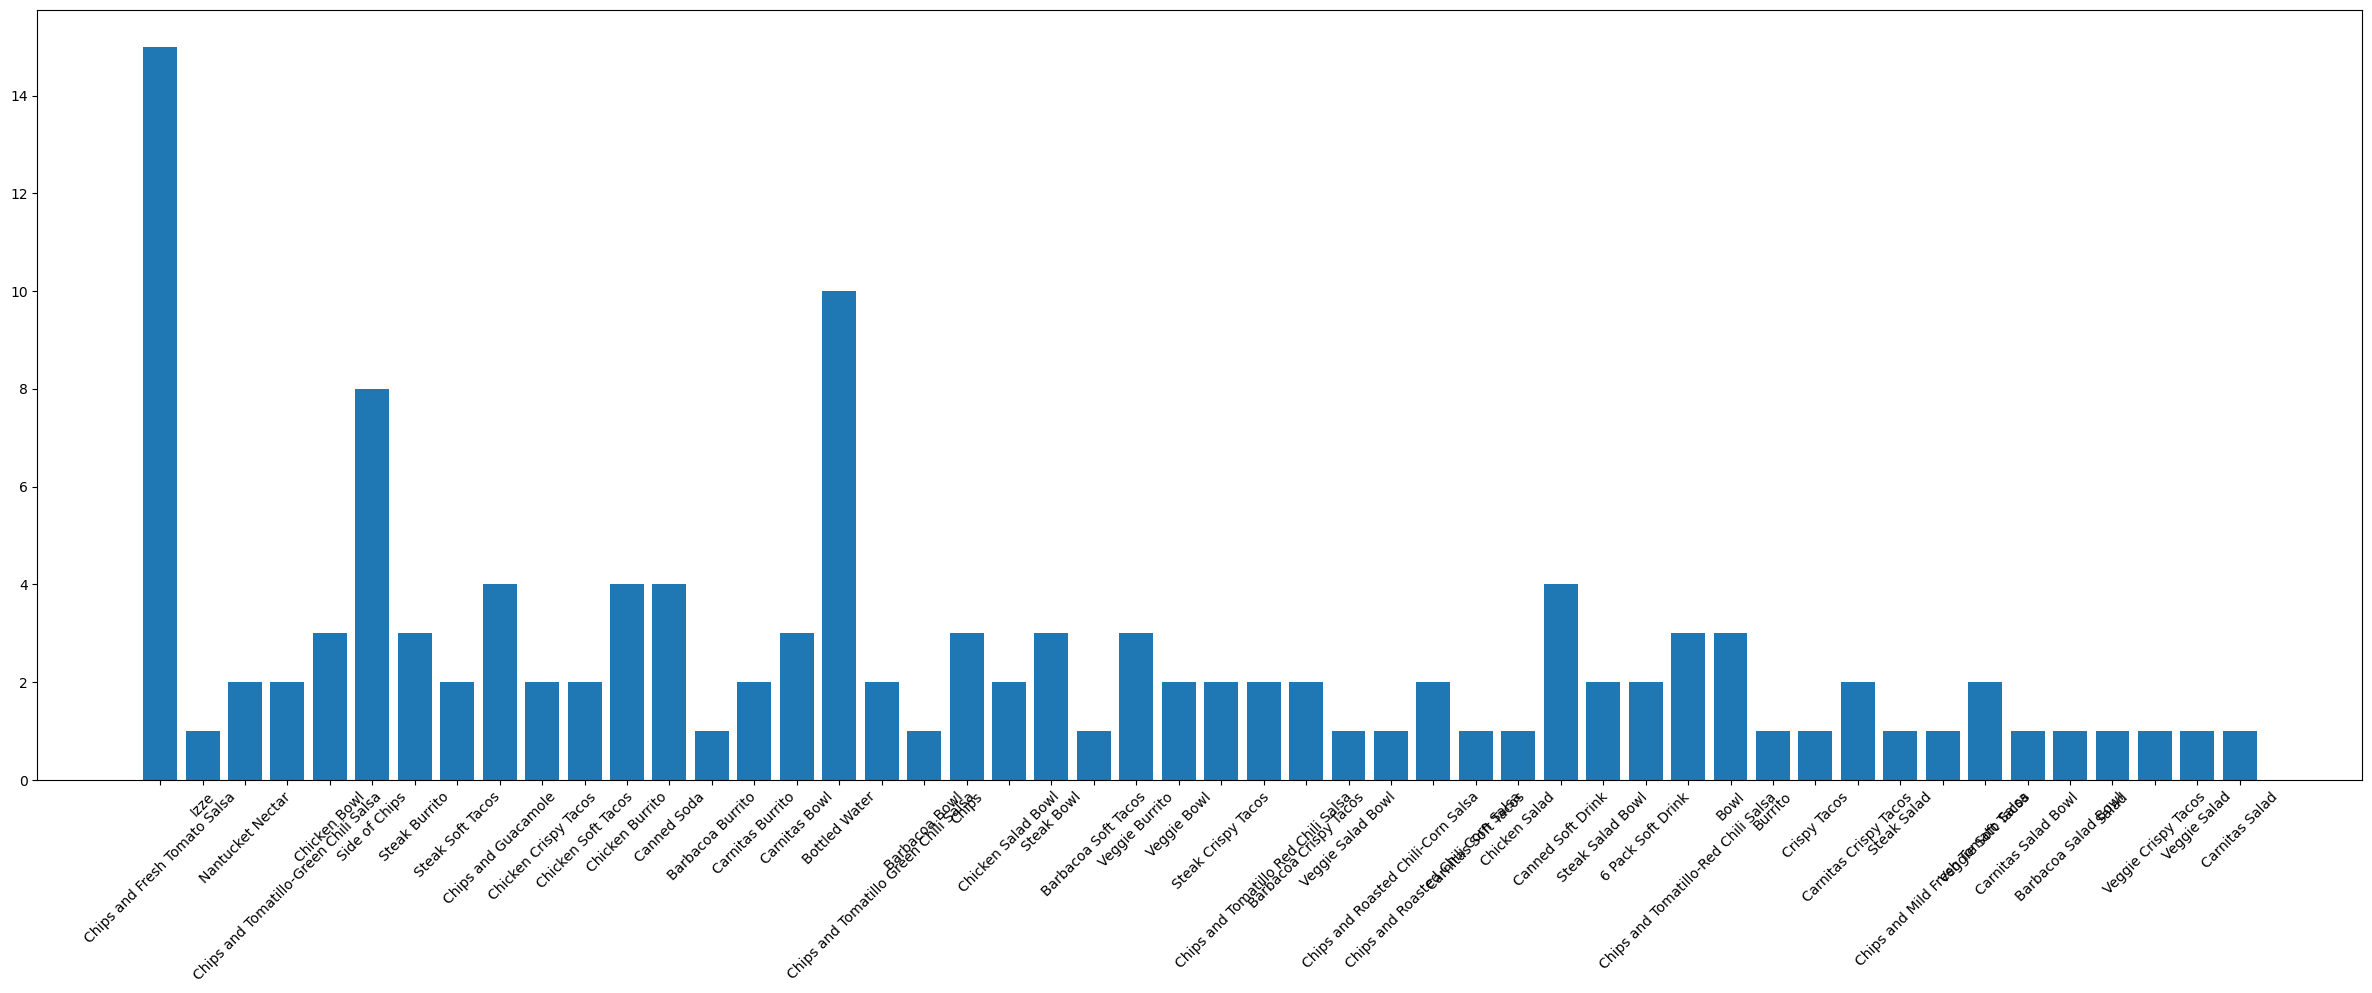

In [14]:
#차트의 크기 조정
plt.figure(figsize = (30, 10))
x = df['item_name']
y = df['quantity']
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#가장 많이 팔린 메뉴 10개 추출->시각화
#중복된 아이템 제거

In [15]:
#가장 많이 팔린 메뉴 10개 추출->시각화
#중복된 아이템 제거

#중복된 아이템 제거하고 판매량 합계 계산
top_itmes = df.groupby('item_name')['quantity'].sum()
print(top_items)


plt.figure(figsize = (10, 6))
top_items.plot(kind = 'bar')
plt.title('Top 10 Items')
plt.xlabel('item_name')
plt.ylabel('quantity')
plt.show()

NameError: name 'top_items' is not defined